In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#!pip install xgboost
import xgboost
from dateutil.relativedelta import relativedelta
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

root_path = 'gdrive/MyDrive/Colab Notebooks/'
path = Path(root_path)
filename = 'o.csv'

df_final = pd.read_csv(path/filename)
df_final


,date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Wind speed
0,01-Jan-2019 - 00:00,334.57,505.57,122.51,66.67,135.46,85.82,13.97,2.85,14.89,0.87
1,02-Jan-2019 - 00:00,357.48,546.75,127.59,62.86,137.47,99.23,12.81,2.96,16.17,0.77
2,03-Jan-2019 - 00:00,371.11,525.56,89.04,69.83,109.71,90.17,12.17,2.48,12.15,1.23
3,04-Jan-2019 - 00:00,314.30,473.55,82.87,64.92,102.09,85.90,11.42,2.87,9.99,0.94
4,05-Jan-2019 - 00:00,310.04,464.17,70.41,50.33,84.16,83.49,10.75,2.23,16.59,0.94
...,...,...,...,...,...,...,...,...,...,...,...
1030,27-Oct-2021 - 00:00,106.56,258.41,83.20,82.22,111.56,30.81,11.41,1.29,25.80,1.16
1031,28-Oct-2021 - 00:00,127.59,265.91,64.58,82.76,96.67,33.13,10.17,1.39,30.78,1.06
1032,29-Oct-2021 - 00:00,129.09,267.68,115.46,93.31,143.74,35.00,11.93,1.73,27.60,0.85
1033,30-Oct-2021 - 00:00,114.10,242.02,44.10,84.71,81.00,33.26,10.59,1.20,26.32,1.19


In [3]:
df_final = df_final.mask(df_final.eq('None')).dropna()
df_final['PM10'] = df_final['PM10'].astype(float)
df_final['NO'] = df_final['NO'].astype(float)
df_final['NO2'] = df_final['NO2'].astype(float)
df_final['CO'] = df_final['CO'].astype(float)
df_final['NOx'] = df_final['NOx'].astype(float)
df_final['SO2'] = df_final['SO2'].astype(float)
df_final['NH3'] = df_final['NH3'].astype(float)
df_final['PM2.5'] = df_final['PM2.5'].astype(float)
df_final['Ozone'] = df_final['Ozone'].astype(float)
df_final['Wind speed'] = df_final['Wind speed'].astype(float)

df_final.drop(columns=['date'],inplace=True)

#df_final['date'] = pd.to_datetime(df_final['date'])
df_final

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Wind speed
0,334.57,505.57,122.51,66.67,135.46,85.82,13.97,2.85,14.89,0.87
1,357.48,546.75,127.59,62.86,137.47,99.23,12.81,2.96,16.17,0.77
2,371.11,525.56,89.04,69.83,109.71,90.17,12.17,2.48,12.15,1.23
3,314.30,473.55,82.87,64.92,102.09,85.90,11.42,2.87,9.99,0.94
4,310.04,464.17,70.41,50.33,84.16,83.49,10.75,2.23,16.59,0.94
...,...,...,...,...,...,...,...,...,...,...
1030,106.56,258.41,83.20,82.22,111.56,30.81,11.41,1.29,25.80,1.16
1031,127.59,265.91,64.58,82.76,96.67,33.13,10.17,1.39,30.78,1.06
1032,129.09,267.68,115.46,93.31,143.74,35.00,11.93,1.73,27.60,0.85
1033,114.10,242.02,44.10,84.71,81.00,33.26,10.59,1.20,26.32,1.19


In [4]:
print(df_final.dtypes)

PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
SO2           float64
CO            float64
Ozone         float64
Wind speed    float64
dtype: object


In [5]:
df_final.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Wind speed'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split
X= df_final.iloc[:,:-1]
y= df_final.iloc[:,-1]
trainX, testX, trainy, testy = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=1)
#random_state=123 shuffle=False

In [7]:
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.009, max_depth=6)
#model = xgboost.XGBRegressor(objective='reg:linear', n_estimators=500, learning_rate=0.006, max_depth=2)
model.fit(trainX,trainy)
pred = model.predict(testX)
MAE= mean_absolute_error(testy, pred)
MSE= mean_squared_error(testy, pred)
RMSE = np.sqrt(mean_squared_error(testy, pred))
print("Mean Absolute Error: %f" % (MAE))
print("Root Mean Square Error: %f" % (RMSE))

Mean Absolute Error: 0.251432
Root Mean Square Error: 0.332943


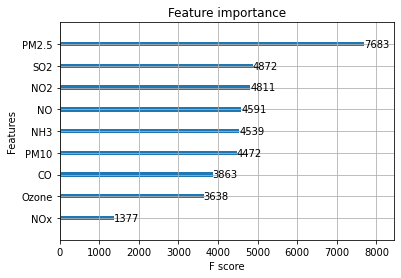

In [8]:
xgboost.plot_importance(model._Booster)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

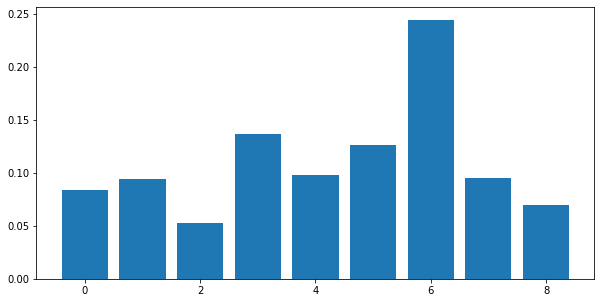

In [9]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [10]:
# feature importance
print(model.feature_importances_)

[0.08384813 0.09433108 0.05269672 0.13654996 0.09799191 0.12577172
 0.2439746  0.09510986 0.069726  ]
